
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Homework - 04  (Total points - 11)</font></center></h1>
<h2><center> <font color='black'> Introduction to Network Analysis</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>


# Homework Instructions


- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.


- The accepted submission format is .ipynb file. Please upload the file on moodle.

- The submission will automatically close on **<font color='red'>5th May 2021 at 23:59 pm</font>**, so please make sure you have enough time to submit the homework. 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 

- Please Click on "**Restart and Run All**" before uploading the '.ipynb' file.

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- **Note: The tasks which involves writing your thoughts should not contain more than 3-4 sentences. It should be clear and concise.**


**<h2><font color='red'>Student info:</font></h2>**


<font color='red'>Full name: </font> Canberk Ozen, Hannula-Katrin Pandis

<font color='red'>Student ID: </font> B97964, B04920



# 1. Knowledge graphs (11 points)
documentation for reference: https://docs.ampligraph.org/en/1.2.0/install.html

## 1.1 Creating Knowledge Graph (2 points)

In this exercise we will create a knowledge graph from text. For this we will be playing with some wikipedia sentences and try to use them as our data source. The data is downloaded from a [Humor detection corpus](https://github.com/CrowdTruth/Short-Text-Corpus-For-Humor-Detection/tree/master/datasets), so please be mindful. :) 

The idea is to parse each of these news articles and extract facts (head, relation, tail) from the sentences. 

Let's get started!

**1.1.1. First import the required packages and load the wiki_sentences.pickle dataset.(No points)**

Hints for import, 
- Pandas: to load data
- Networkx: for KG visualization
- Spacy: For NLP operations
- Spacy.matcher: for relation extraction
- Matplotlib: for plotting

Hints for data, 
- You can use `pandas.read_pickle()` to load the data 

In [ ]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher 
import matplotlib.pyplot as plt
import numpy as np

# import nltk
# nltk.download('punkt')
# import re
# from nltk.tokenize import sent_tokenize

sentences = pd.read_pickle("wiki_sentences.pickle")

**1.1.2 Run a funtion which extracts entities from a sentence. Make sure to test it on sample sentences (first few from the dataset). (0.25 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

entity_pairs = []

for i in tqdm(sentences, position=0, leave=True):
  entity_pairs.append(get_entities(i))

100%|██████████| 5251/5251 [03:51<00:00, 22.73it/s]


In [ ]:
# Sanity Check
for sentence in sentences[:10]:
    print(sentence)
    print(get_entities(sentence))
    print('-'*50)

The two make love.
['two', 'love']
--------------------------------------------------
See Great Apostasy.
['Great Apostasy', '']
--------------------------------------------------
Sheep sound 3.
['Sheep', '']
--------------------------------------------------
As one wrestler lost , another one entered.
['one', '']
--------------------------------------------------
Soon , they became best friends.
['Soon  they', '']
--------------------------------------------------
The boys make friends.
['boys', 'friends']
--------------------------------------------------
They have two children.
['They', 'two  children']
--------------------------------------------------
Fire begins to return.
['Fire', '']
--------------------------------------------------
That isn't true.
['That', '']
--------------------------------------------------
Telemachus gets home first.
['Telemachus', '']
--------------------------------------------------


**1.1.3 Write a function which extracts relation from a sentence. Make sure to test it on sample sentences (first few from the dataset). (0.25 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

relations = []
for i in tqdm(sentences, position=0, leave=True):
    relation = get_relation(i)
    relations.append(relation)

100%|██████████| 5251/5251 [03:47<00:00, 23.04it/s]


In [ ]:
# Sanity Check
for sentence in sentences[:10]:
    print(sentence)
    print(get_relation(sentence))
    print('-'*50)

The two make love.
make
--------------------------------------------------
See Great Apostasy.
See
--------------------------------------------------
Sheep sound 3.
sound
--------------------------------------------------
As one wrestler lost , another one entered.
entered
--------------------------------------------------
Soon , they became best friends.
became best
--------------------------------------------------
The boys make friends.
make
--------------------------------------------------
They have two children.
have
--------------------------------------------------
Fire begins to return.
begins
--------------------------------------------------
That isn't true.
is
--------------------------------------------------
Telemachus gets home first.
gets
--------------------------------------------------


**1.1.4 Combine the entities and relation together to form a Pandas dataframe. The dataframe will have 3 columns - source, edge and target. Some sentences may have missing entities, remove such rows.(1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [ ]:
# extract subject
source = [pair[0] for pair in entity_pairs]

# extract object
target = [pair[1] for pair in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'edge':relations, 'target':target})

In [ ]:
kg_df_2 = kg_df.replace({"": None}).dropna()
kg_df_2.head(40)

,source,edge,target
0,two,make,love
5,boys,make,friends
6,They,have,two children
10,many Suharto,had,one name
11,Gaye,had,three children
12,They,have,three children
13,Little,known,life
14,Many breeds,carry pinto,pinto patterns
15,Three species,live in fresh,fresh water rivers
16,She,decides,away home


**1.1.5 Create a NetworkX graph using the dataframe created in the last subsection. Next we will plot the networkx graph.(0.5 points)**<br>
<font color='red'>Write your observation in the `Your answer` cell.</font>

Hint, 
- `from_pandas_edgelist()` can be used for transforming dataframe to networkx graph.
- `nx.spring_layout(G)` can be used for visualization. <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df_2, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
                          

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0,

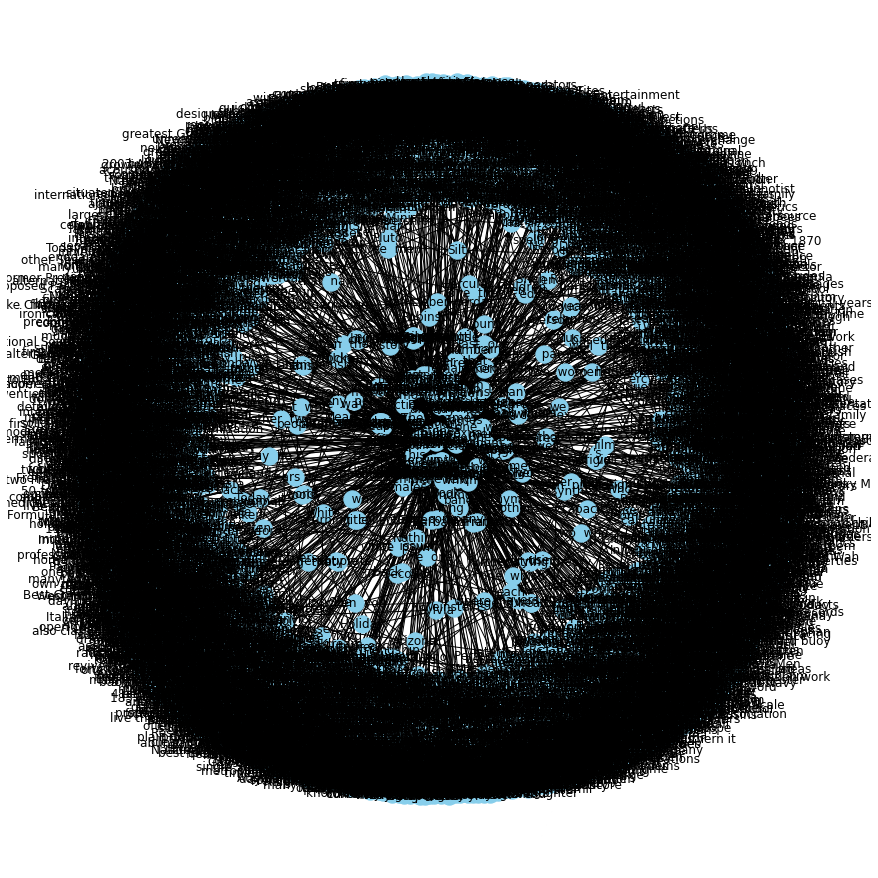

In [ ]:

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

**<font color='red'>Your answer:</font>** The visualisation above is just to present how complex our graph is. I will focus on one relation only to show you how our graph is structured on a smaller scale.

In [ ]:
kg_df_2['edge'].value_counts()[5:20]

born in       65
had           48
take          39
comes from    36
won           31
took          29
used          25
set           25
be            24
see           23
became        23
was in        22
were          21
make          21
gives         20
Name: edge, dtype: int64

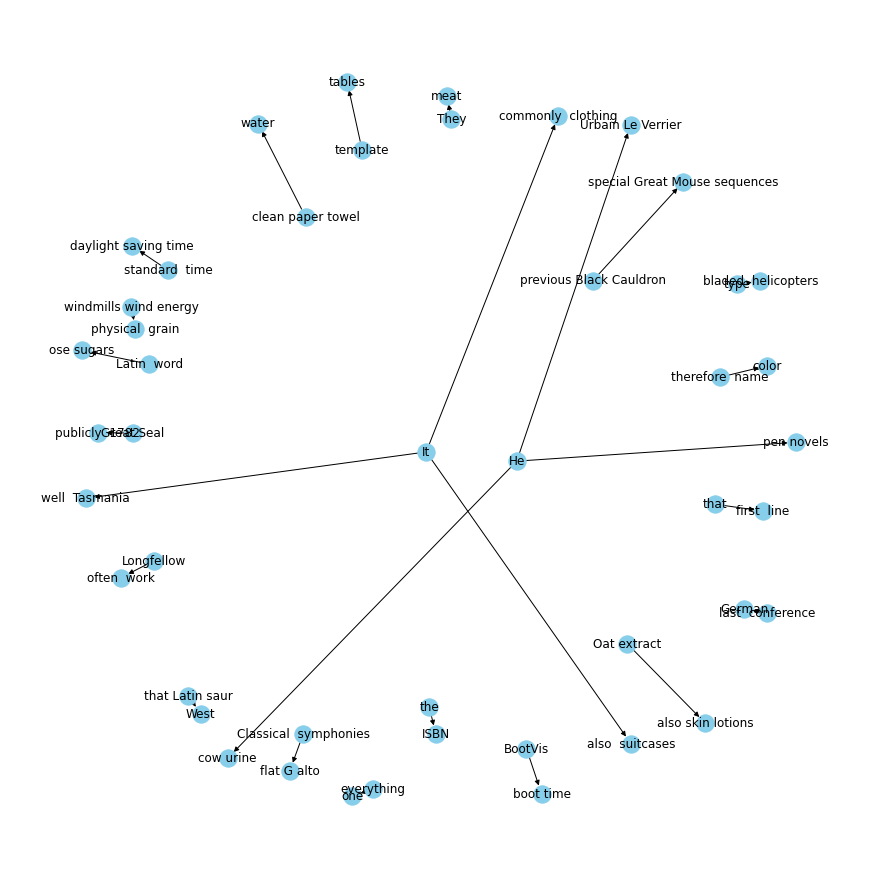

In [ ]:
G=nx.from_pandas_edgelist(kg_df_2[kg_df_2['edge']=="used"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
                          

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

This graph looks logical in the sense that it tries to say things like 'classical symphonies used flat G-alto', which is correct. But there some triplets which left me confused as well, for example 'windmills wind energy' - used - physical grain triplet looks weird...

Of course if the entities were proper nouns we would have interpreted the triplets better, for example one dude used cow urine, pen novels and Urbain Le Verrier(?). Yet we don't know the name of this man, most probably he was a scientist who further developed Urbain Le Verrier's findings.


Let's check one more relation.

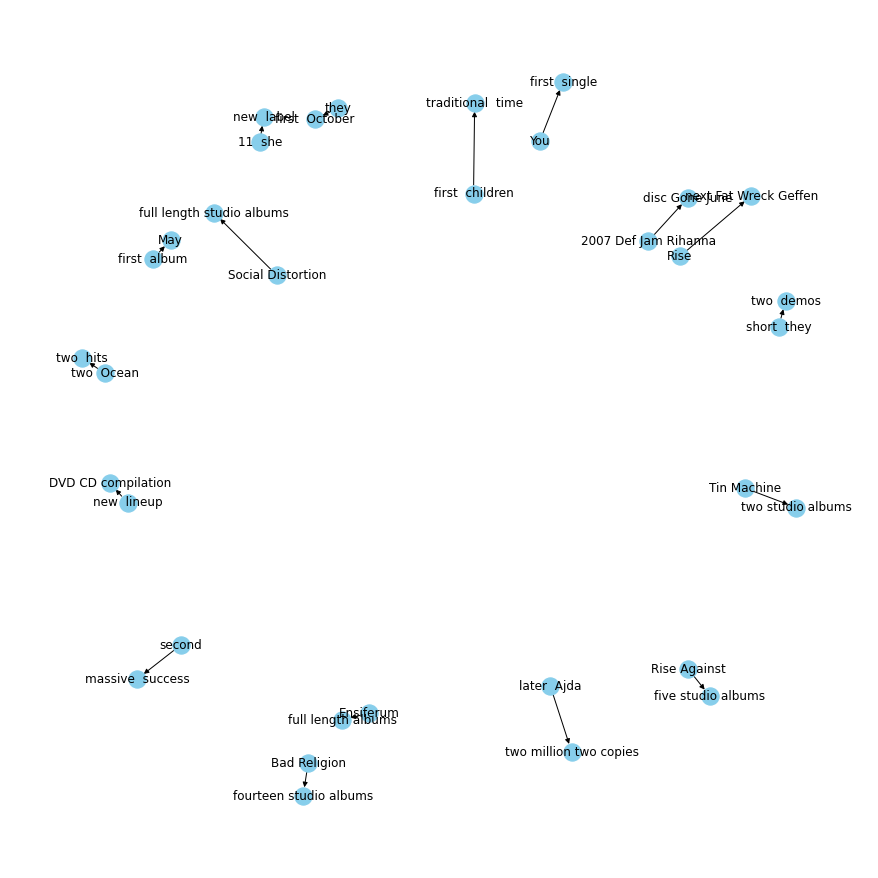

In [ ]:
G=nx.from_pandas_edgelist(kg_df_2[kg_df_2['edge']=="released"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
                          

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Looks like our triplets are somewhat correct. In the second graph, I see a good number of musicians as entities(Social Distortion, Ensiferum etc) and them releasing albums. It'd have been better if we were able to capture the release dates as well, but for now I'll take the checks above as sufficient enough. Though of course, the triplets could have been better defined.

## 1.2 Knowledge graph for clustering and classification (9 points)

In this exercise you are going to use the dataset from [kaggle](https://www.kaggle.com/jaykay12/odi-cricket-matches-19712017#ContinousDataset.csv) that contains all the One-Day International (ODI) Cricket Matches in the interval 1971-2017. Cricket is a popular game developed by Britishers and is very popular in South Asian countries, Australia, U.K, South Africa, and Carribean Islands. If you would like more information, [Lagaan](https://www.youtube.com/watch?v=oSIGQ0YkFxs) is an intersting Oscar candidate movie that explains the relation between colonial taxes and cricket, set in India.

In this dataset the field "Ground" refers to the location where the match was held. 

**1.2.1 Load the dataset cricket_data.csv. Create the entities match_id, ground_id,country_id,home_team_id,away_team_id and neutral that are going to be part of our knowledge graph. (0.5 point)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [ ]:
df = pd.read_csv('cricket_data.csv')

df["match_id"] = df.index.values.astype(str)
df["match_id"] =  "Match_" + df['match_id']
df['ground_id'] = 'City' + df.ground.str.title().str.replace(' ', '')
df['country_id'] = 'Country' + df.host_country.str.title().str.replace(' ', '')
df['home_team_id'] = 'Team' + df.home_team.str.title().str.replace(' ', '')
df['away_team_id'] = 'Team' + df.away_team.str.title().str.replace(' ', '')
df["neutral"] = df['neutral'].astype(str)

df.head()

,ground,date,winner,host_country,home_team,away_team,neutral,match_id,ground_id,country_id,home_team_id,away_team_id
0,Melbourne,"Jan 5, 1971",Australia,Australia,Australia,England,False,Match_0,CityMelbourne,CountryAustralia,TeamAustralia,TeamEngland
1,Manchester,"Aug 24, 1972",England,England,England,Australia,False,Match_1,CityManchester,CountryEngland,TeamEngland,TeamAustralia
2,Lord's,"Aug 26, 1972",Australia,England,England,Australia,False,Match_2,CityLord'S,CountryEngland,TeamEngland,TeamAustralia
3,Birmingham,"Aug 28, 1972",England,England,England,Australia,False,Match_3,CityBirmingham,CountryEngland,TeamEngland,TeamAustralia
4,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,New Zealand,Pakistan,False,Match_4,CityChristchurch,CountryNewZealand,TeamNewZealand,TeamPakistan


**1.2.2 Select manually 80%  as train set of the data and create the triples ['subject', 'predicate', 'object'] using the entities from 1.2.1. (1 point)** Hint: If there are some errors generated while building the triples check if match_id was formed correctly in 1.2.1<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [ ]:
df['train'] = df.index <= int(df.shape[0] * 0.8)

print(df['train'].value_counts(normalize=True))

triples = []
for _, row in df[df["train"]].iterrows():
    # Home and away information
    home_team = (row["home_team_id"], "isHomeTeamIn", row["match_id"])
    away_team = (row["away_team_id"], "isAwayTeamIn", row["match_id"])
    
    # Match results
    if row["winner"] == row["home_team"]:
        score_home = (row["home_team_id"], "winnerOf", row["match_id"])
        score_away = (row["away_team_id"], "loserOf", row["match_id"])
    else:
        score_away = (row["away_team_id"], "winnerOf", row["match_id"])
        score_home = (row["home_team_id"], "loserOf", row["match_id"])

    # Match characteristics
    ground = (row["match_id"], "inGround", row["ground_id"])
    country = (row["match_id"], "inCountry", row["country_id"])
    neutral = (row["match_id"], "isNeutral", row["neutral"])
    year = (row["match_id"], "atYear", row["date"][-4:])
    
    triples.extend((home_team, away_team, score_home, score_away, ground, country, neutral, year))

triples_df = pd.DataFrame(triples, columns=["subject", "predicate", "object"])

triples_df

True     0.800109
False    0.199891
Name: train, dtype: float64


,subject,predicate,object
0,TeamAustralia,isHomeTeamIn,Match_0
1,TeamEngland,isAwayTeamIn,Match_0
2,TeamAustralia,winnerOf,Match_0
3,TeamEngland,loserOf,Match_0
4,Match_0,inGround,CityMelbourne
...,...,...,...
47131,TeamWestIndies,winnerOf,Match_5891
47132,Match_5891,inGround,CityAuckland
47133,Match_5891,inCountry,CountryNewZealand
47134,Match_5891,isNeutral,False


**1.2.3 Select only one match_id and visualize its knowledge graph using networkx (0.50 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

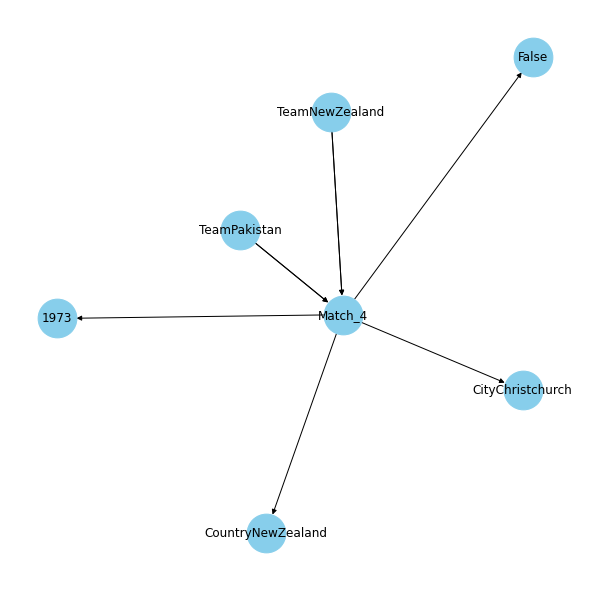

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

match_df = triples_df[(triples_df.subject=="Match_4") | (triples_df.object=="Match_4")]

G=nx.from_pandas_edgelist(match_df, "subject", "object", 
                          edge_attr="predicate", create_using=nx.MultiDiGraph())

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k = 1)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

**1.2.4 Split the triples into train and validation set. Set the test size equal to 20% of the records in the dataset. Train the ComplEx model for knowledge graphs embeddings and evaluate its performance using mr_score, mrr_score, hits_at_n_score. (1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

**1.2.5 Use the same train and validation set obtained from 1.2.4 and train the TransE model for knowledge graphs embeddings and evaluate its performance using mr_score, mrr_score, hits_at_n_score. Use the same parameters for TransE as used for ComplEx (1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

**1.2.6 Use the same train and validation set obtained from 1.2.4 and train the HolE model for knowledge graphs embeddings and evaluate its performance using mr_score, mrr_score, hits_at_n_score. Use the same parameters for HolE as used for ComplEx (1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [ ]:
%%capture

!pip install ampligraph

In [ ]:
#Please import this version of tensorflow to work with Ampligraph
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 34kB/s 
     |████████████████████████████████| 512kB 37.2MB/s 
     |████████████████████████████████| 3.8MB 34.3MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=213db12ea3e7e7b6a6dacdf02d05c1f69c70fe29c4f66f6e37af0e4e4f13e326
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninsta

In [ ]:
from ampligraph.evaluation import train_test_split_no_unseen 
triples_df.shape

X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=0.2)
print('Train set size: ', X_train.shape)
print('Test set size: ', X_valid.shape)

Train set size:  (37709, 3)
Test set size:  (9427, 3)


In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [ ]:
from ampligraph.latent_features import ComplEx

model = ComplEx(batches_count=50,
                epochs=300,
                k=100,
                eta=20,
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                seed=0, 
                verbose=True)

tf.logging.set_verbosity(tf.logging.ERROR)

model.fit(X_train)

Average Loss:   0.290519: 100%|██████████| 300/300 [03:14<00:00,  1.54epoch/s]


In [ ]:
from ampligraph.latent_features import TransE

model1 = TransE(batches_count=50,
                epochs=300,
                k=100,
                eta=20,
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                seed=0, 
                verbose=True)

tf.logging.set_verbosity(tf.logging.ERROR)

model1.fit(X_train)

Average Loss:   0.479170: 100%|██████████| 300/300 [01:27<00:00,  3.42epoch/s]


In [ ]:
from ampligraph.latent_features import HolE

model2 = HolE(batches_count=50,
                epochs=300,
                k=100,
                eta=20,
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                seed=0, 
                verbose=True)

tf.logging.set_verbosity(tf.logging.ERROR)

model2.fit(X_train)

Average Loss:   1.788130: 100%|██████████| 300/300 [03:13<00:00,  1.55epoch/s]


In [ ]:
from ampligraph.evaluation import evaluate_performance,  mr_score, mrr_score, hits_at_n_score

filter_triples = np.concatenate((X_train, X_valid))

ranks = evaluate_performance(X_valid,
                             model=model, 
                             filter_triples=filter_triples,
                             use_default_protocol=True,
                             verbose=True)

WARNING - DeprecationWarning: use_default_protocol will be removed in future. Please use corrupt_side argument instead.


100%|██████████| 9427/9427 [01:19<00:00, 118.64it/s]


In [ ]:
from ampligraph.evaluation import evaluate_performance,  mr_score, mrr_score, hits_at_n_score

filter_triples = np.concatenate((X_train, X_valid))

ranks1 = evaluate_performance(X_valid,
                             model=model1, 
                             filter_triples=filter_triples,
                             use_default_protocol=True,
                             verbose=True)

WARNING - DeprecationWarning: use_default_protocol will be removed in future. Please use corrupt_side argument instead.


100%|██████████| 9427/9427 [00:58<00:00, 162.01it/s]


In [ ]:
from ampligraph.evaluation import evaluate_performance,  mr_score, mrr_score, hits_at_n_score

filter_triples = np.concatenate((X_train, X_valid))

ranks2 = evaluate_performance(X_valid,
                             model=model2, 
                             filter_triples=filter_triples,
                             use_default_protocol=True,
                             verbose=True)

WARNING - DeprecationWarning: use_default_protocol will be removed in future. Please use corrupt_side argument instead.


100%|██████████| 9427/9427 [01:20<00:00, 117.16it/s]


In [ ]:
mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.28
MR: 986.95
Hits@10: 0.40
Hits@3: 0.32
Hits@1: 0.21


In [ ]:
mr = mr_score(ranks1)
mrr = mrr_score(ranks1)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks1, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks1, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks1, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.16
MR: 1443.67
Hits@10: 0.24
Hits@3: 0.18
Hits@1: 0.10


In [ ]:
mr = mr_score(ranks2)
mrr = mrr_score(ranks2)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks2, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks2, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks2, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.20
MR: 1989.14
Hits@10: 0.30
Hits@3: 0.23
Hits@1: 0.14


**1.2.7 What are your observations using these three embeddings? Which performed better according to you for this dataset? (1 points)**<br>
<font color='red'>Write your observation in the `Your answer` cell.</font>

**<font color='red'>Your answer:</font>** The hit scores are the highest for the embeddings generated by ComplEx algorithm. For example, %32 of the time, the correct triplet will be included in the top three triplets returned by the algorithm and %21 of the time the algorithm will be able to detect the correct triplet among all the corrupted ones.

Same conclusion can be reached by peeking into the MRR scores... Since it is equal to the mean of reciprocal ranks, the higher it gets, the better the embedding performance. Like with the hits, ComplEx algorithm takes the lead here.

I intentionally do not want to evaluate the performance wrt the MR scores since it was [stated](https://docs.ampligraph.org/en/latest/generated/ampligraph.evaluation.mr_score.html#ampligraph.evaluation.mr_score) that MR score is not robust to outliers.

**1.2.8 Create a dictionary with the embeddings (from ComplEx embedding) of all teams and use PCA to project embeddings to 2D space. Cluster the team embeddings in 6 clusters and plot them in a 2D graph. (1 points)<br>
Note: Now onwards in this Homework, we will be using only ComplEx embedding.**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>


In [ ]:
%%capture
!pip install seaborn adjustText
!git clone https://github.com/wyldebeast-wunderliebe/incf.countryutils.git
!pip install incf.countryutils/.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from incf.countryutils import transformations
%matplotlib inline

In [ ]:
id_to_name_map = {**dict(zip(df.home_team_id, df.home_team)), **dict(zip(df.away_team_id, df.away_team))}

teams = pd.concat((df.home_team_id[df["train"]], df.away_team_id[df["train"]])).unique()
team_embeddings = dict(zip(teams, model.get_embeddings(teams)))

embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in team_embeddings.values()]))

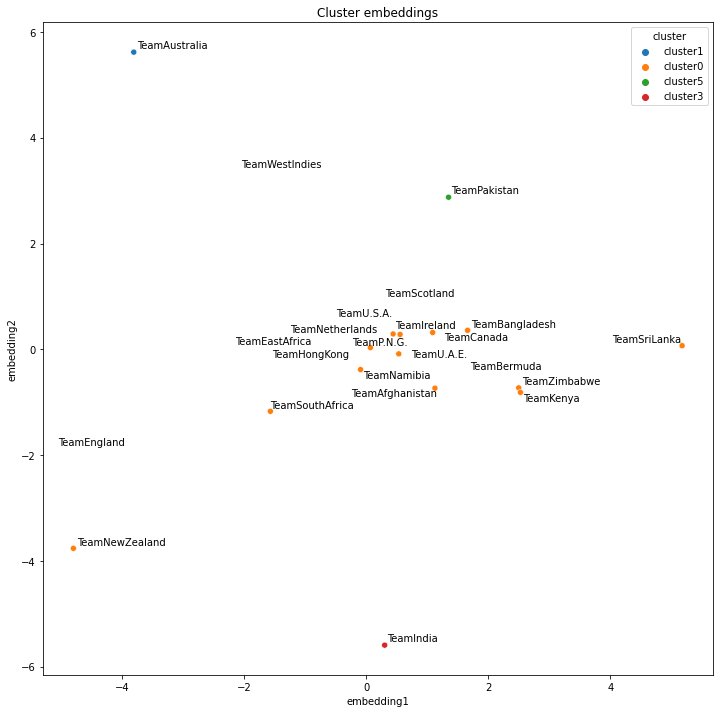

In [ ]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=6, n_init=50, max_iter=500, random_state=0)
clusters = find_clusters(teams, model, clustering_algorithm, mode='entity')

def cn_to_ctn(country):
    try:
        return transformations.cn_to_ctn(id_to_name_map[country])
    except KeyError:
        return "unk"

plot_df = pd.DataFrame({"teams": teams, 
                        "embedding1": embeddings_2d[:, 0], 
                        "embedding2": embeddings_2d[:, 1],
                        "continent": pd.Series(teams).apply(cn_to_ctn),
                        "cluster": "cluster" + pd.Series(clusters).astype(str)})

def plot_clusters(hue):
    plt.figure(figsize=(12, 12))
    plt.title("{} embeddings".format(hue).capitalize())
    ax = sns.scatterplot(data=plot_df[plot_df.continent!="unk"], x="embedding1", y="embedding2", hue=hue)
    texts = []
    for i, point in plot_df.iterrows():
      texts.append(plt.text(point['embedding1']+0.02, point['embedding2']+0.01, str(point["teams"])))
    adjust_text(texts)

plot_clusters("cluster")

**1.2.9 In order to predict if the home team is going to win or lose we need to define a target variable. Create a new column called "result" in the dataframe that takes the value 'home_team_wins' if the home team is the winner and 'home_team_loses' if the home team has not won the match. (0.5 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>


In [ ]:
df['result'] = np.nan

df.loc[df['winner'] != df['home_team'], 'result'] = 'home_team_loses'
df.loc[df['winner'] == df['home_team'], 'result'] = 'home_team_wins'

df['result'].value_counts()

home_team_wins     4101
home_team_loses    3263
Name: result, dtype: int64

**1.2.10 Create a function that extracts the features (knowledge embeddings for home and away teams) and the target for a particular subset of the dataset (You can use the function from practice session). Run the function to get the variables for X_train, y_train, X_test and y_test. Remember that the train set indices are the same as in 1.2.2 (1 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>



In [ ]:
def get_features_target(mask):
    
    def get_embeddings(team):
        return team_embeddings.get(team, np.full(200, np.nan))
    
    X = np.hstack((np.vstack(df[mask].home_team_id.apply(get_embeddings).values),
                   np.vstack(df[mask].away_team_id.apply(get_embeddings).values)))
    y = df[mask]['result'].values
    return X, y

clf_X_train, y_train = get_features_target((df["train"]))
clf_X_test, y_test = get_features_target((~df["train"]))
clf_X_train.shape, clf_X_test.shape

((5892, 400), (1472, 400))

**1.2.11 Create an instance of XGBClassifier and fit the training samples. Evaluate the accuracy of the model in test set. (0.5 points)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>


In [ ]:
# !pip install xgboost
from xgboost import XGBClassifier

clf_model = XGBClassifier(n_estimators=500, max_depth=5, objective="multi:softmax", num_class=2)

clf_model.fit(clf_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, num_class=2, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# baseline
df[~df["train"]]['result'].value_counts(normalize=True)

home_team_wins     0.547554
home_team_loses    0.452446
Name: result, dtype: float64

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, clf_model.predict(clf_X_test))

0.6474184782608695

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks. Please change X in the next cell into your estimate.

<font color='red'> **Answer:** </font> ~3-6 hours




## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:** 7</font>